### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [6]:
# Create a path
path = r'C:\Users\shaiv\Downloads\ClimateWins'

In [8]:
# Import weather dataset
climate = pd.read_csv(os.path.join(path, '02 Data', '2010_PCA.csv'))

In [10]:
climate.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-14.637266,2.443633,-6.587953,5.879753,1.287782,-2.892771,-0.966803,-4.191464,2.556764,0.804381
1,-14.472253,3.727368,-8.395420,7.412833,5.734935,-2.273606,-1.451451,-7.049814,4.883152,3.543863
2,-14.044808,2.113257,-7.237470,4.824640,4.256978,-1.496644,-3.319999,-1.674158,3.582551,0.818561
3,-11.597381,0.959781,-6.926106,3.362258,3.953786,-4.625995,0.228261,-2.149960,2.390329,4.411747
4,-8.904840,0.120644,-6.657080,2.499185,-0.161643,-4.715468,2.377175,1.594747,2.848863,2.575002


In [12]:
# Import the 'Pleasant weather' dataset
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [14]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 02 Filtering & Wrangling

In [17]:
climate.isnull().sum()

PC1     0
PC2     0
PC3     0
PC4     0
PC5     0
PC6     0
PC7     0
PC8     0
PC9     0
PC10    0
dtype: int64

## 03 Dendrograms (with reduced data)

In [24]:
# retitle df to re-use clustering codes from previous script
X_all_stations = climate.copy()

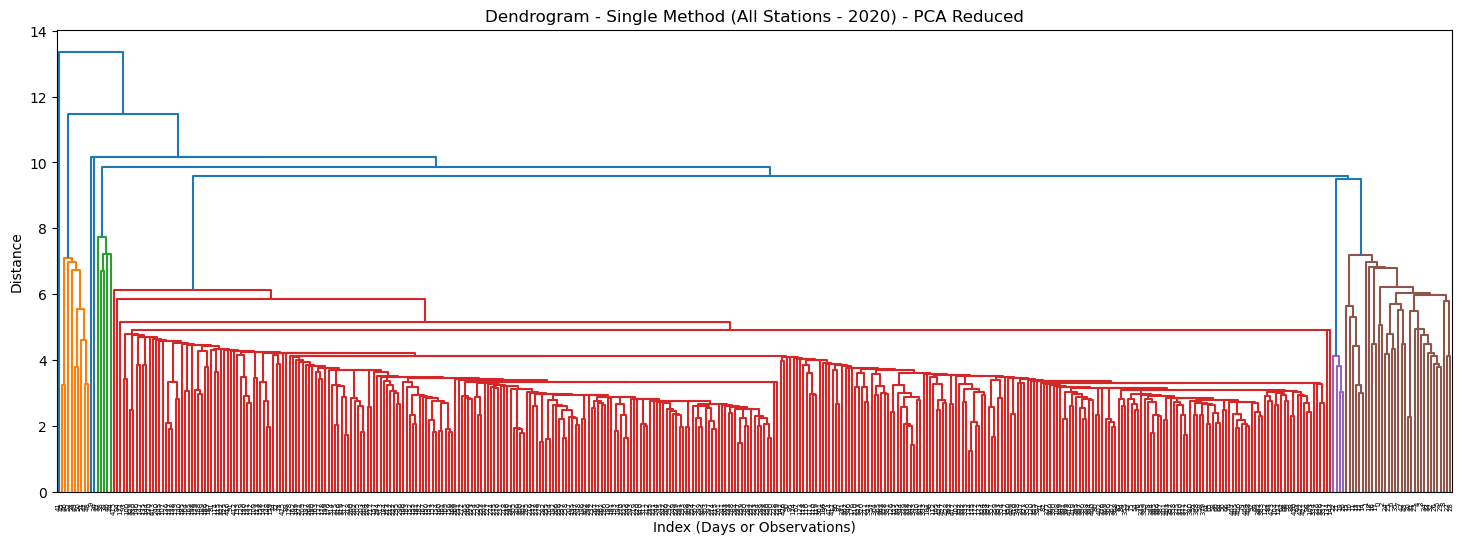

In [26]:
# Single linkage method for all stations
distance1 = linkage(X_all_stations, method='single')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Single Method (All Stations - 2020) - PCA Reduced")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

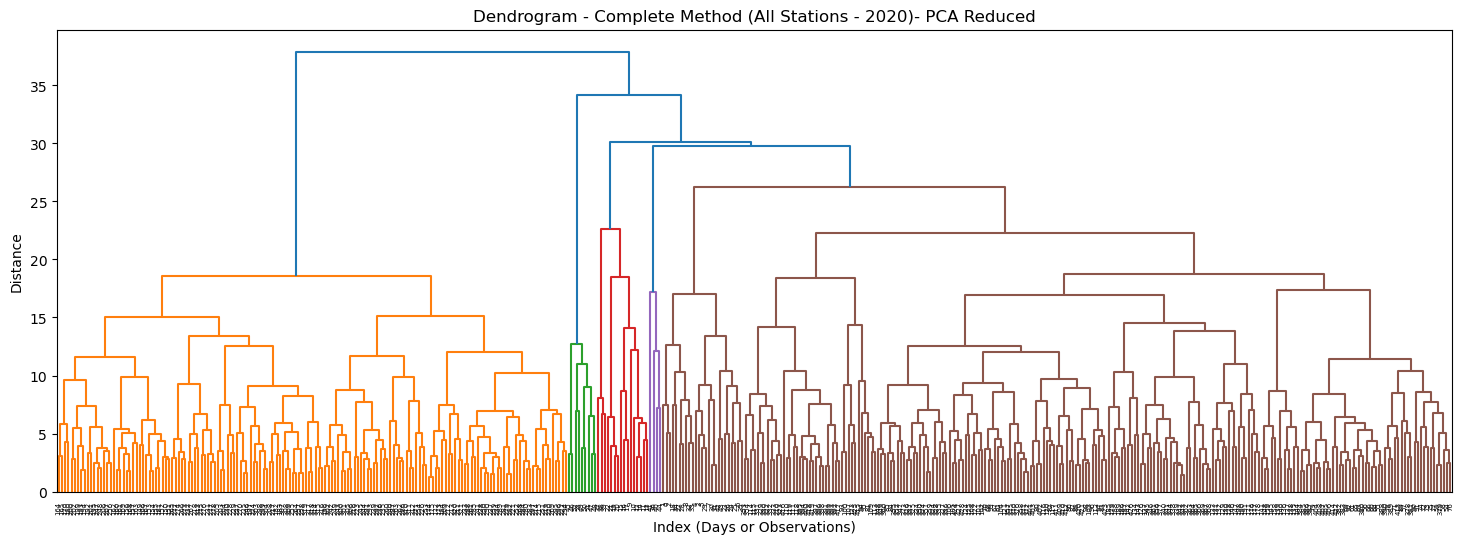

In [28]:
# Complete linkage method for all stations
distance1 = linkage(X_all_stations, method='complete')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Complete Method (All Stations - 2020)- PCA Reduced")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

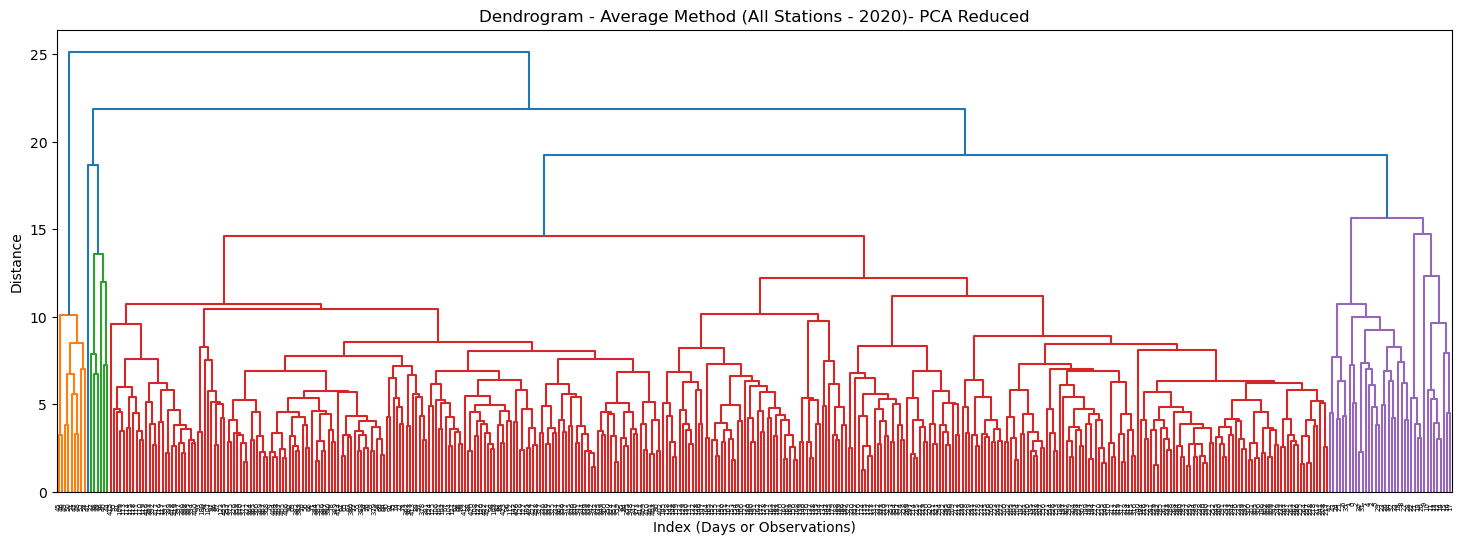

In [30]:
# Average linkage method for all stations
distance1 = linkage(X_all_stations, method='average')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Average Method (All Stations - 2020)- PCA Reduced")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

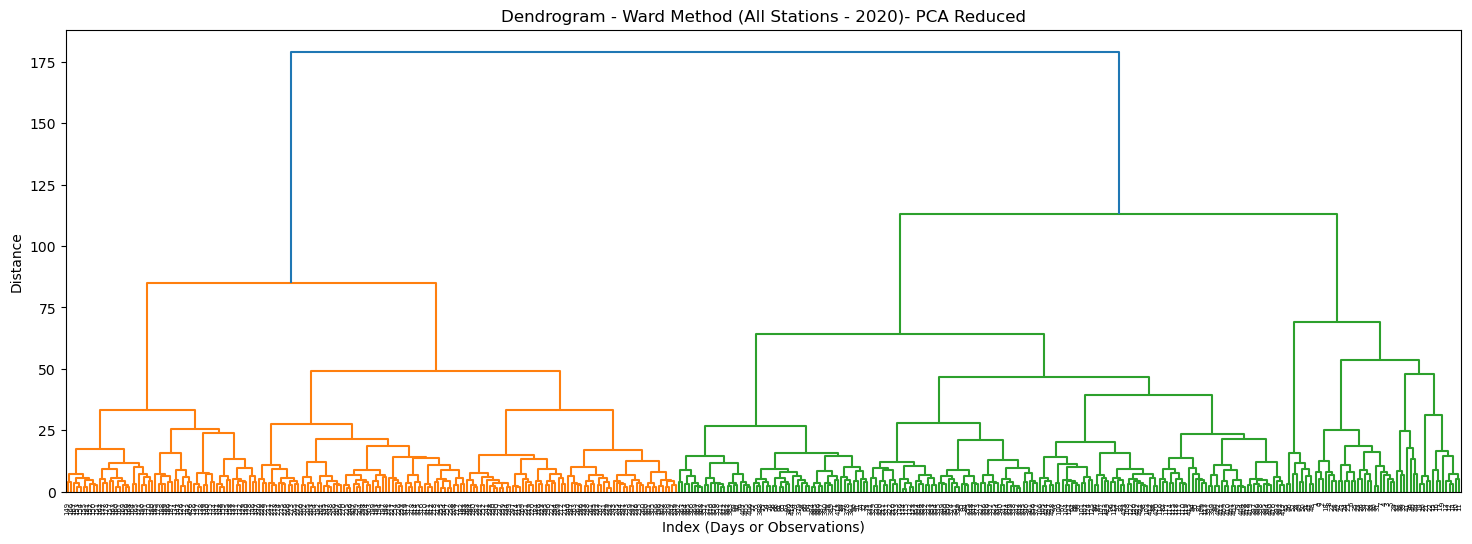

In [32]:
# Ward linkage method for all stations
distance1 = linkage(X_all_stations, method='ward')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Ward Method (All Stations - 2020)- PCA Reduced")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

## 04 Insights

### Insights from Dendrograms (Using PCA-Reduced Data – All Stations, 2020)

- Single Linkage Method: Still not very effective—most data points are linked into one long chain. Even with the simplified dataset, this method fails to reveal any distinct groupings or meaningful structure.

- Complete Linkage Method: Performs noticeably better with the reduced data, forming 4–5 clearer clusters. It appears to capture geographic influences, such as whether a station is coastal or mountainous, more effectively.

- Average Linkage Method: Produces 2–3 broad clusters, offering a cleaner version of the results from the full dataset. It highlights general weather trends but lacks the resolution to identify more localized differences.

- Ward’s Method: Remains the most effective approach. It divides the data into 3 well-defined, balanced clusters that likely reflect distinct climate zones (e.g., coastal, inland, and high-altitude regions). PCA enhanced this method’s clarity, making the groupings more interpretable and visually distinct.

### Conclusion:
- Ward is still the best method, and now it runs faster and gives even clearer results thanks to PCA.
- Simplifying the data with PCA kept the important patterns but removed extra detail that wasn't helping, making clustering more effective.